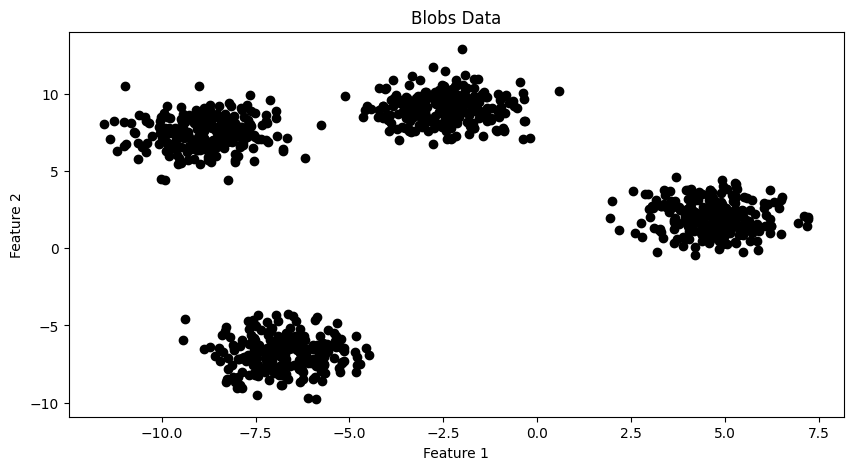

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


X, _ = make_blobs(n_samples=1000, centers=4, random_state=42)


plt.figure(figsize=(10, 5))

plt.scatter(X[:, 0], X[:, 1], c='black')
plt.title('Blobs Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

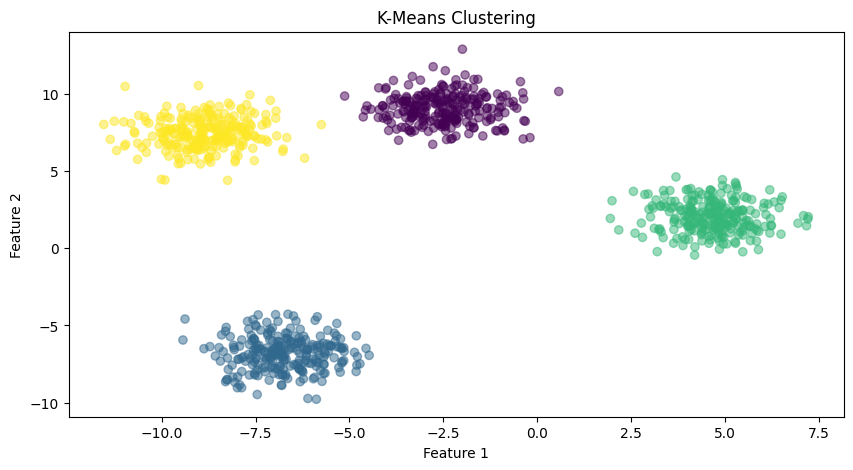

In [2]:
from sklearn.cluster import KMeans

# K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Visualize K-Means clustering
plt.figure(figsize=(10, 5))

plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

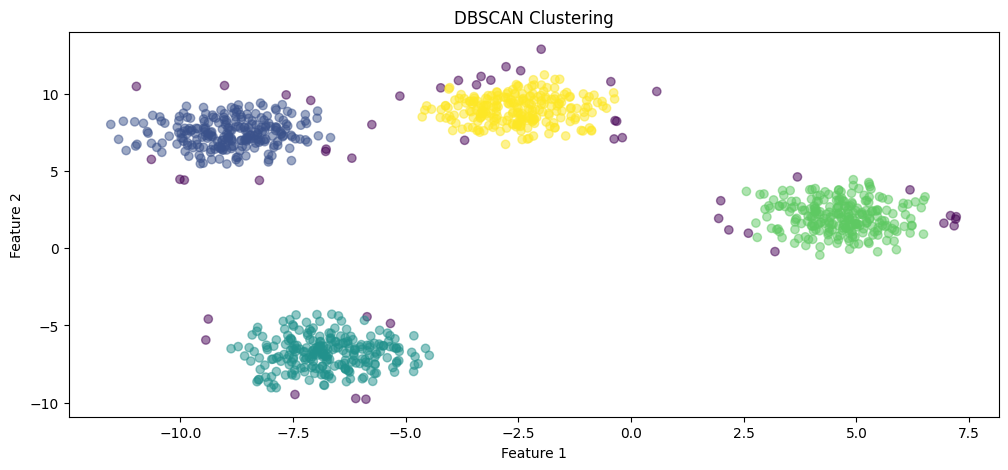

In [3]:
from sklearn.cluster import DBSCAN

# DBSCAN clustering
dbscan = DBSCAN(eps=0.6, min_samples=6)
dbscan_labels = dbscan.fit_predict(X)

# Visualize DBSCAN clustering
plt.figure(figsize=(12, 5))

plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.5)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

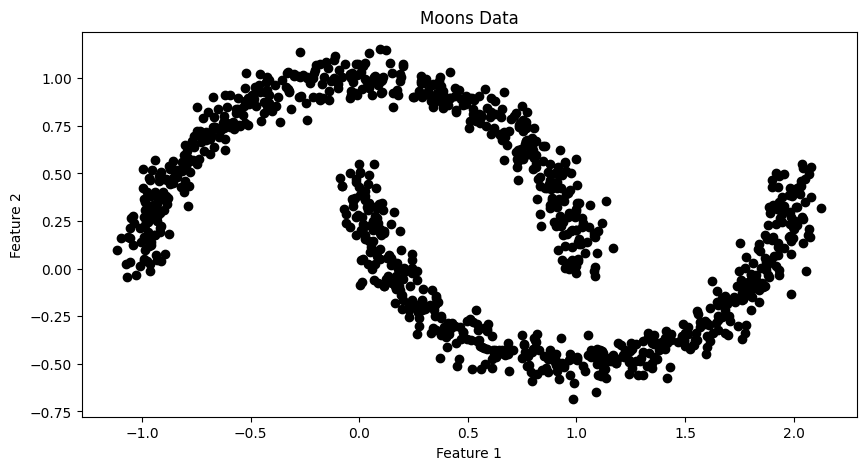

In [4]:
from sklearn.datasets import make_moons

# Generate synthetic data with two moon-shaped clusters
X, _ = make_moons(n_samples=1000, noise=0.06)

# Visualize Core Data
plt.figure(figsize=(10, 5))

plt.scatter(X[:, 0], X[:, 1], c='black')
plt.title('Moons Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

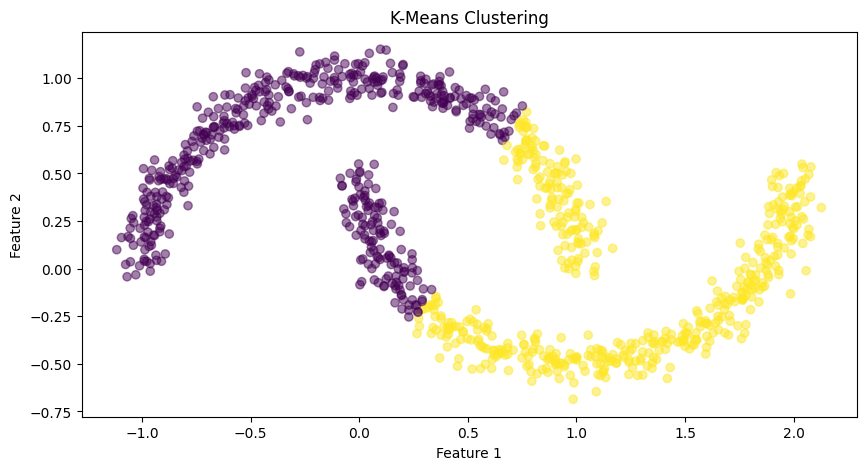

In [5]:
# K-Means clustering
kmeans = KMeans(n_clusters=2)
kmeans_labels = kmeans.fit_predict(X)

# Visualize K-Means clustering
plt.figure(figsize=(10, 5))

plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

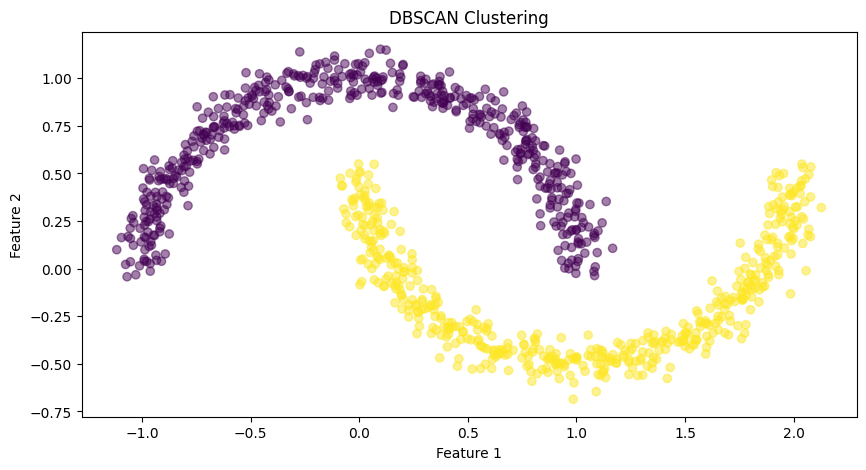

In [6]:
# DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Visualize DBSCAN clustering
plt.figure(figsize=(10, 5))

plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.5)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

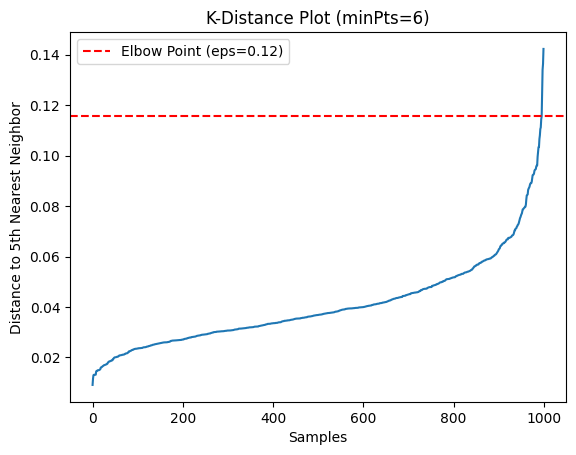

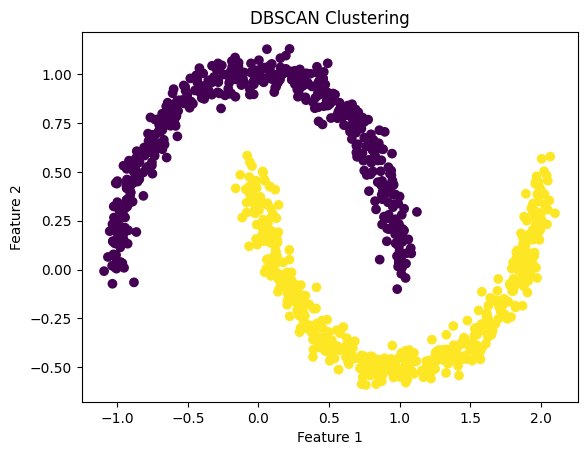

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.neighbors import NearestNeighbors

# Function to compute the k-distance plot
def k_distance_plot(X, minPts):
    k = minPts - 1  # k is one less than minPts
    # Compute the distances to the k nearest neighbors for each point
    nbrs = NearestNeighbors(n_neighbors=k).fit(X)
    distances, _ = nbrs.kneighbors(X)
    # Sort the distances
    distances = np.sort(distances[:, -1])  # Select the distances to the k-th neighbor
    return distances

# Generate example data (replace with your own data if needed)
X, _ = make_moons(n_samples=1000, noise=0.05)

# Plot k-distance plot for minPts = 6
distances = k_distance_plot(X, minPts=6)

# We look for the point with the maximum change in distance
diff_distances = np.diff(distances, 2)  # Calculate second order difference
max_change_index = np.argmax(diff_distances) + 1  # Add 1 to account for the offset
eps = distances[max_change_index]  # Get the distance value at the identified index

# Plot the elbow point
plt.plot(distances)
plt.axhline(y=eps, color='red', linestyle='--', label=f'Elbow Point (eps={eps:.2f})')
plt.xlabel('Samples')
plt.ylabel('Distance to 5th Nearest Neighbor')
plt.title('K-Distance Plot (minPts=6)')
plt.legend()
plt.show()

# Perform DBSCAN clustering with chosen eps
dbscan = DBSCAN(eps=eps, min_samples=6)
labels = dbscan.fit_predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()
